In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils

grader= utils.Grader() #Defining the submission grader object 

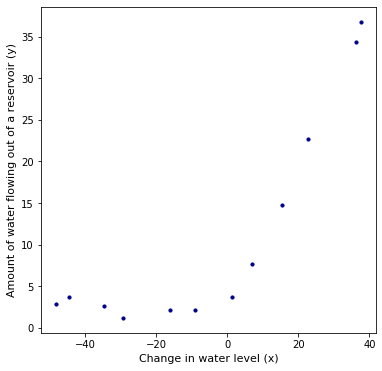

12


In [2]:
data= loadmat('ex5data1.mat')

# Extract train, cross validation, test data from dictionary
# and also convert y's form from a 2-D matrix (MATLAB format) to a numpy vector
X,y= data['X'], data['y'][:,0]
Xtest, ytest= data['Xtest'], data['ytest'][:,0]
Xcv, ycv= data['Xval'], data['yval'][:,0]

m=y.size #No. of training examples

#Plotting the data
plt.figure(figsize=(6,6))
plt.scatter(X,y, s=10, color='darkblue')
plt.xlabel('Change in water level (x)', fontsize=11)
plt.ylabel("Amount of water flowing out of a reservoir (y)",fontsize=11)
plt.show();
print(m)

In [3]:
def linearRegCostFunction( X, y, theta, lambda_=0.0):
    
    m= y.size
    
    h = np.matmul(X,theta)
    J = (1 / (2 * m)) * np.sum((h - y)**2) + (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    
    grad = (1 / m) * np.matmul(X.transpose(),(h - y))
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

    return J, grad

In [4]:
theta = np.array([1, 1])
J,_= linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)
print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)



In [5]:
grader[1] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |   0 /  25 | 
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  25 / 100 |  



In [6]:
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)


print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



In [7]:
grader[2] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  50 / 100 |  



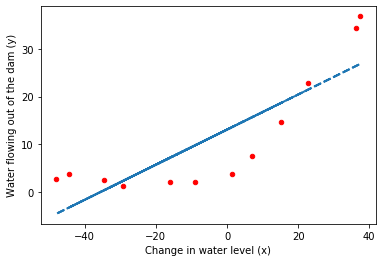

In [8]:
#BEST FIT LINE TO THE GIVING DATASET, REGULARIZATION ABSENT BECAUSE LINE IS OBV UNDERFITTING
X_aug= np.insert(X,0,1, axis=1)
theta = utils.trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)

#PLOTTING BEGINS
plt.scatter(X,y, s=20, color="red")
plt.plot(X, np.matmul(X_aug, theta), "--", lw=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show();

In [9]:
def learningCurve(X, y, Xcv, ycv, lambda_=0.0):
    m=y.size
    error_train=np.zeros(m)
    error_cv=np.zeros(m)
    for i in range(1, m+1):
        theta_t = utils.trainLinearReg(linearRegCostFunction, X[:i,:], y[:i], lambda_)
        error_train[i-1],_=linearRegCostFunction(X[:i,:], y[:i], theta_t, lambda_=0)
        error_cv[i-1],_cv=linearRegCostFunction(Xcv, ycv, theta_t, lambda_=0)
        
    print(m)
    return error_train,error_cv

12


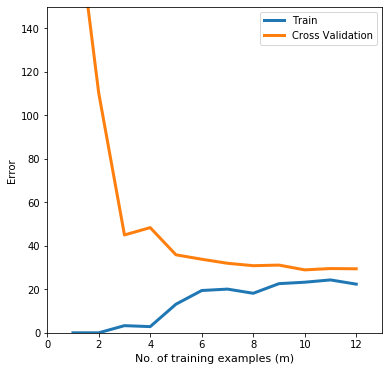

In [10]:
X_aug = np.insert(X,0,1, axis=1)
Xcv_aug = np.insert(Xcv,0,1,axis=1)
error_train, error_cv = learningCurve(X_aug, y, Xcv_aug, ycv, lambda_=0)

#PLOTTING OF LEARNING CURVES BEGINS
plt.figure(figsize=(6,6))
plt.plot(np.arange(1,m+1), error_train,np.arange(1,m+1), error_cv,lw=3)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('No. of training examples (m)', fontsize=11)
plt.ylabel('Error')
plt.axis([0,13,0,150])
plt.show();

In [11]:
grader[3] = learningCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
10
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  70 / 100 |  



In [12]:
def polyFeatures(X, p):
    #X is a vector of size m x 1, we need to mp it into a polynomial vector of m x p
    # and each row's ith position has x^i
    m=X.shape[0]
    X_map= np.zeros((m,p))
    
    for i in range(m):
        for j in range(1,p+1):
            X_map[i,j-1]= X[i]**j
            
    return X_map

In [13]:
grader[4] = polyFeatures
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
10
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |  10 /  10 | Nice work!
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  80 / 100 |  



In [14]:
p=8
# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = utils.featureNormalize(X_poly)
X_poly= np.insert(X_poly,0,1,axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.insert( X_poly_test,0,1, axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_cv = polyFeatures(Xcv, p)
X_poly_cv -= mu
X_poly_cv /= sigma
X_poly_cv = np.insert(X_poly_cv,0,1, axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

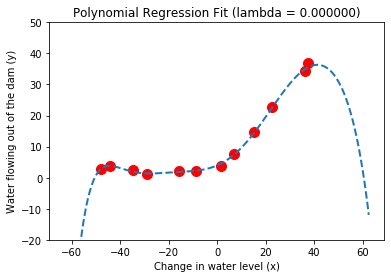

12


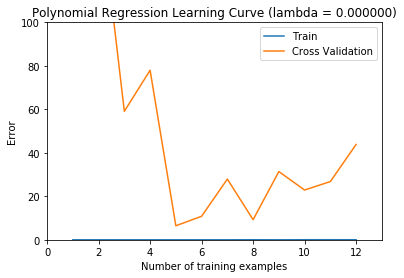

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121511
  	3		0.000000	59.071640
  	4		0.000000	77.997856
  	5		0.000000	6.449508
  	6		0.000000	10.825774
  	7		0.000000	27.922419
  	8		0.025083	9.256265
  	9		0.000182	31.381205
  	10		0.033367	22.879956
  	11		0.035666	26.797570
  	12		0.029686	43.849641


In [17]:
#TRAINING THE POLYNOMIAL FEATURES WITH THE TRAINING FUNCTION FROM UTILS.PY
lambda_=0
theta = utils.trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)
plt.scatter(X,y, s=100, c='red')
utils.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])
plt.show();

error_train, error_cv = learningCurve(X_poly, y, X_poly_cv, ycv, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_cv)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])
plt.show();

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_cv[i]))

## 3.3 Selecting $\lambda$ using a cross validation set
From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda = 0$) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda = 100$) does not fit the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda = 1$) can provide a good fit to the data.

In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to complete the code in the function validationCurve. Specifically, you should should use the utils.trainLinearReg function to train the model using different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [22]:
def validationCurve(X, y, Xcv, ycv):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambda_vec))
    error_cv = np.zeros(len(lambda_vec))
    
    for i in range(len(lambda_vec)):
        lambda_=lambda_vec[i]
        theta_t = utils.trainLinearReg(linearRegCostFunction, X, y, lambda_)
        error_train[i],_=linearRegCostFunction(X, y, theta_t, lambda_=0.0)
        error_cv[i],_cv=linearRegCostFunction(Xcv, ycv, theta_t, lambda_=0.0)

    return lambda_vec,error_train,error_cv

lambda		Train Error	Validation Error
 0.000000	0.029686	43.849641
 0.001000	0.112684	9.872207
 0.003000	0.170937	16.304746
 0.010000	0.221505	16.943800
 0.030000	0.281840	12.829510
 0.100000	0.459324	7.586857
 0.300000	0.921763	4.636826
 1.000000	2.076201	4.260600
 3.000000	4.901371	3.822930
 10.000000	16.092273	9.945554


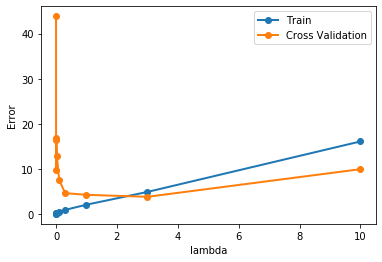

In [19]:
lambda_vec, error_train, error_cv = validationCurve(X_poly, y, X_poly_cv, ycv)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_cv, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_cv[i]))


In [20]:
grader[5] = validationCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
10
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |  10 /  10 | Nice work!
                           Validation Curve |  20 /  20 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



## 3.4 Optional (ungraded) exercise: Computing test set error
In the previous part of the exercise, you implemented code to compute the cross validation error for various values of the regularization parameter $\lambda$. However, to get a better indication of the model’s performance in the real world, it is important to evaluate the “final” model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$). For this optional (ungraded) exercise, you should compute the test error using the best value of $\lambda$ you found. In our cross validation, we obtained a test error of 3.8599 for $\lambda = 3$.

You do not need to submit any solutions for this optional (ungraded) exercise.

In [23]:
#lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
#error_test= np.zeros(len(lambda_vec))

#for i in range(len(lambda_vec)):    
#lambda_=lambda_vec[i]
theta_t = utils.trainLinearReg(linearRegCostFunction, X, y, lambda_=3.0)
error_test,_=linearRegCostFunction(Xtest, ytest, theta_1, lambda_=0)
error_test

144.1507391488971